In [19]:
from dataloader import *

X, y = load_image_vectors("./enrico_image_data.pkl")

--- Load raw image vectors success ---
X: (1458, 3072)
y[reference labels]: (1458,)


In [20]:
# use kmeans to cluster the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
# predict the cluster for each data point
y_pred = kmeans.predict(X)
print(y_pred)

[ 1 13 16 ...  8 16 16]


In [21]:
# build mapping from cluster id to real id
cluster_to_real = {}
for i in range(len(y_pred)):
    if y_pred[i] not in cluster_to_real:
        cluster_to_real[y_pred[i]] = y[i]

# transform y_pred to real id
for i in range(len(y_pred)):
    y_pred[i] = cluster_to_real[y_pred[i]]

# calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred))

0.18175582990397804


d:\Install\Anaconda\envs\ml-labs\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Install\Anaconda\envs\ml-labs\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


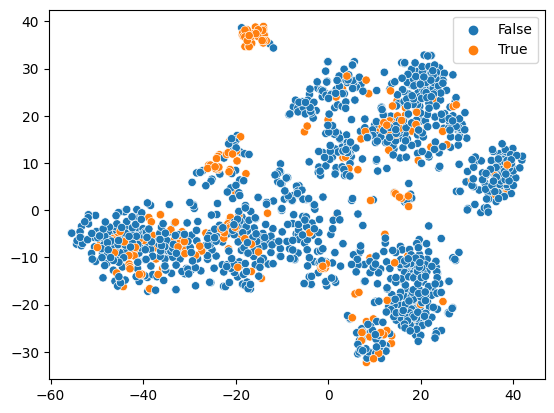

In [23]:
# use tsne to visualize the data
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

# plot the result
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=(y_pred==y))
plt.show()